In [1]:
import numpy as np
import pandas as pd
import numpy.random as rng
import json
import matplotlib.pyplot as plt
import glob
import seaborn as sns

In [27]:
files = ['results_eval/null.npz', 
         #'results_eval/linear_main_effects.npz',
         #'results_eval/quadratic_main_effects.npz',
         'results_eval/linear_all_effects.npz',
         'results_eval/quadratic_all_effects.npz',
         'results_eval/ann.npz']

model_names = []

rows = []
for file in files:
    
    d = np.load(file, allow_pickle=True)
    cfg = d['cfg'].tolist()
    
    output_cols = cfg['output_cols']
    labels = [l.replace('process_','') for l in output_cols]

    mae_by_output = d['split_mae_by_output']
    n_repeats, n_outputs = mae_by_output.shape
    
    for r in range(n_repeats):
        for o in range(n_outputs):
            rows.append({
                "model" : cfg['model']['name'],
                "repeat" : r,
                "output" : labels[o],
                "mae" : mae_by_output[r, o]
            })

results = pd.DataFrame(rows)
results

,model,repeat,output,mae
0,Null,0,Hydrogen,0.000015
1,Null,0,Methane,0.000063
2,Null,0,Ethane,0.001327
3,Null,0,Propane,0.007247
4,Null,0,i-Butane,0.009353
...,...,...,...,...
755,ANN,9,Mcyclopentan,0.000081
756,ANN,9,Benzene,0.000005
757,ANN,9,Cyclohexane,0.000056
758,ANN,9,2-Mhexane,0.000087


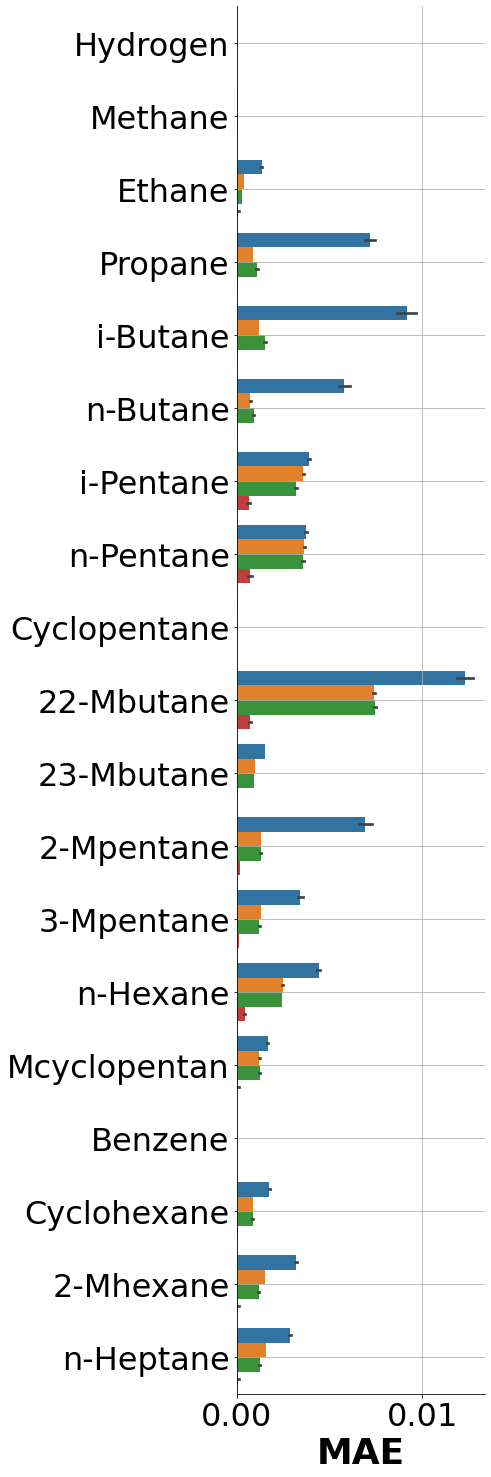

In [33]:
g = sns.catplot(x="mae", y="output", hue="model", data=results, kind='bar', orient='h', ci='sd', aspect=0.25, height=20, legend=False)
ax = g.ax
ax.tick_params(axis='x', labelsize=32)
ax.tick_params(axis='y', labelsize=32)
ax.set_ylabel('')
ax.set_xlabel('MAE', fontsize=36, fontweight='bold')
ax.grid(True)